In [ ]:
#|hide
# Copyright 2022 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
# 
#     https://www.apache.org/licenses/LICENSE-2.0
# 
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# earthengine-jupyter

> Tools for working with the Earth Engine from a Jupyter development environment

**NOTICE: This is an experimental project and is not an officially supported Google project. You are welcome to use it, but we do not guarantee stability.**

## How to use

This lib contains a `Map` class that can be used to display an interactive map.

In [ ]:
import ee
from ee_jupyter.ipyleaflet import Map

In [ ]:
# Intialize the Earth Engine client library.
ee.Initialize()

In [ ]:
map1 = Map(center=(37.5924, -122.09), zoom=8)
map1

Map(center=[37.5924, -122.09], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zo…

Define an Earth Engine image layer, and add it to the interactive map.

In [ ]:
img1 = ee.Image("LANDSAT/LC09/C02/T1_L2/LC09_044034_20220127")
visualization = {
    'bands': ['SR_B4', 'SR_B3', 'SR_B2'],
    'min': 0.2 / 0.0000275,
    'max': 0.4 / 0.0000275,
}
map1.addLayer(eeObject=img1, visParams=visualization, name='Landsat scene')

We can also create an inspector object and associate it with the previously created map.

In [ ]:
from ee_jupyter.ipyleaflet import Inspector

inspector1 = Inspector(map_object=map1)
inspector1

Inspector(layout=Layout(border_bottom='solid', border_left='solid', border_right='solid', border_top='solid', …

Typically when you create a inspector object, you will want to display it near the map.

In [ ]:
from ipywidgets import HBox

display(HBox([map1, inspector1]))

:::{.callout-tip}
## Tip With Caption

Note that Jupyter widgets do not interact with each other when published as documentation. Open up this notebook in a Jupyter environment to see the interaction. 
:::

# Displaying a Map Image

If you want to display a static (non-interactive) image, you can do that as well.  The `embed=True` parameter will allow the image to be saved within the notebook.

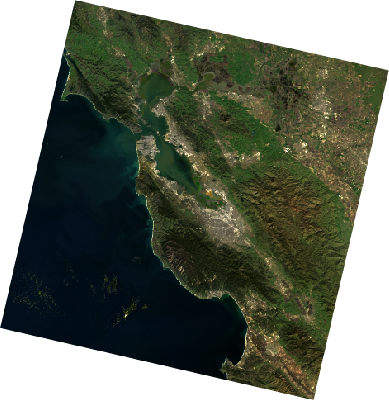

In [ ]:
from IPython.display import Image


visualization['dimensions'] = 400  # maximum dimension for the image
url = img1.getThumbUrl(visualization)

Image(url=url, format='png', embed=True)